<a href="https://colab.research.google.com/github/Nish-hub94/AppliedMLProject/blob/main/AML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Industrial IOT Fault Detection Model**
##### The dataset contains 1000 raw data. They are taken from IIOT devices' sensors with an idea of creating a machine learning model for predictive maintenance and fault diagnosis.  
#### Contributed by: Lakshan Siriwardhana, Nishel Perispulle, Tharanga Dissanayake, Lahiru Samaraweera.

## **Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.manifold import TSNE


## **Data loading & Data Reading**

In [2]:
df = pd.read_csv('industrial_fault_detection_data_1000.csv', index_col=0, skipinitialspace='True')
df

,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
Timestamp,,,,,,
2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1
2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1
2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0
2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1
2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0
...,...,...,...,...,...,...
2023-03-10 16:35:00,0.182424,102.556413,9.595887,0.601657,90.561384,0
2023-03-10 16:36:00,0.925582,126.529170,7.471820,0.601657,90.561384,0
2023-03-10 16:37:00,0.223137,55.516641,7.929364,0.601657,90.561384,0


## **Data Pre-Processing** 
### **Data Cleaning**

In [3]:
### First, We should get an idea about the Data and their relationship ###
print(df.shape)
print(df.duplicated().any()) # Duplicate value check
print(df.isnull().values.any()) # Null Value Check  # No Null values are available.  
print(df.head())
df.describe()

(1000, 6)
False
False
                     Vibration (mm/s)  Temperature (°C)  Pressure (bar)  \
Timestamp                                                                 
2023-03-10 00:00:00          0.437086         64.810634        7.785117   
2023-03-10 00:01:00          0.955643         93.352076        7.740936   
2023-03-10 00:02:00          0.758795        119.835667        9.718764   
2023-03-10 00:03:00          0.638793        108.577991        7.748639   
2023-03-10 00:04:00          0.240417        114.524892        7.815849   

                     RMS Vibration  Mean Temp  Fault Label  
Timestamp                                                   
2023-03-10 00:00:00       0.601657  90.561384            1  
2023-03-10 00:01:00       0.601657  90.561384            1  
2023-03-10 00:02:00       0.601657  90.561384            0  
2023-03-10 00:03:00       0.601657  90.561384            1  
2023-03-10 00:04:00       0.601657  90.561384            0  


,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,0.541231,90.561384,8.507217,6.016565e-01,9.056138e+01,0.479000
std,0.262924,23.375191,0.872023,1.110779e-14,7.108983e-13,0.652675
min,0.104169,50.257461,7.000035,6.016565e-01,9.056138e+01,0.000000
25%,0.312376,69.285942,7.784053,6.016565e-01,9.056138e+01,0.000000
50%,0.547127,91.498713,8.501842,6.016565e-01,9.056138e+01,0.000000
75%,0.769888,110.837205,9.277311,6.016565e-01,9.056138e+01,1.000000
max,0.999746,129.953098,9.993463,6.016565e-01,9.056138e+01,2.000000


In [4]:
# Map numeric labels to descriptive names
label_mapping = {0: 'No Fault', 1: 'Bearing Fault', 2: 'Overheating'}
df['Fault Type'] = df['Fault Label'].map(label_mapping)

df.head()


,Vibration (mm/s),Temperature (°C),Pressure (bar),RMS Vibration,Mean Temp,Fault Label,Fault Type
Timestamp,,,,,,,
2023-03-10 00:00:00,0.437086,64.810634,7.785117,0.601657,90.561384,1,Bearing Fault
2023-03-10 00:01:00,0.955643,93.352076,7.740936,0.601657,90.561384,1,Bearing Fault
2023-03-10 00:02:00,0.758795,119.835667,9.718764,0.601657,90.561384,0,No Fault
2023-03-10 00:03:00,0.638793,108.577991,7.748639,0.601657,90.561384,1,Bearing Fault
2023-03-10 00:04:00,0.240417,114.524892,7.815849,0.601657,90.561384,0,No Fault


### **Feature Extraction**

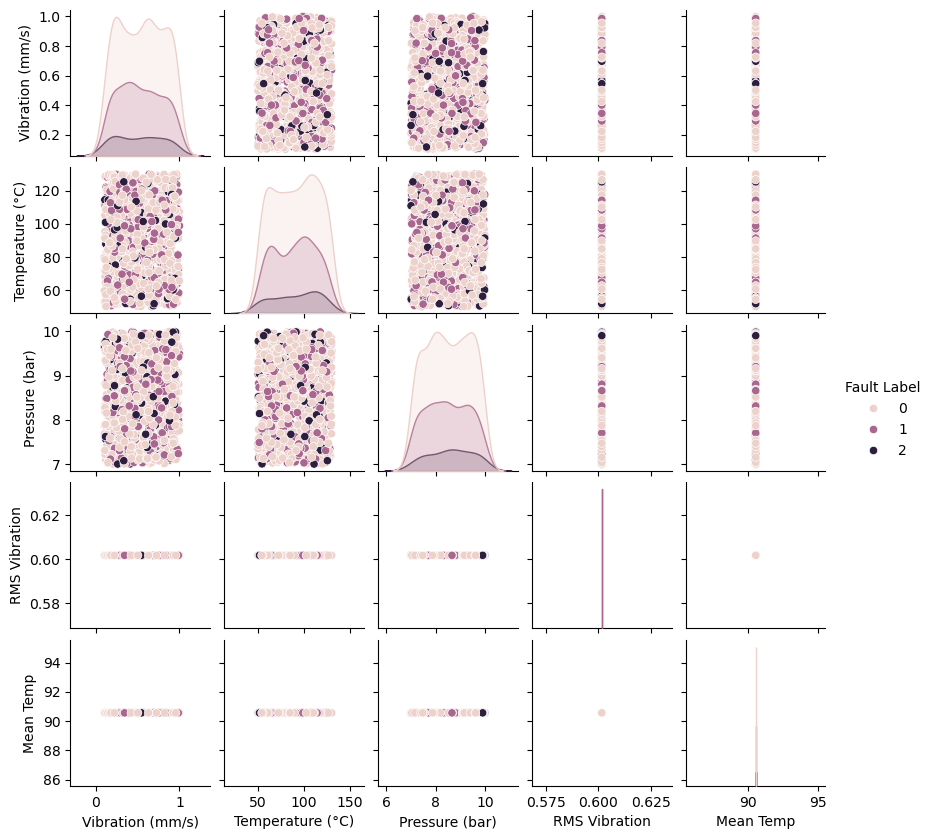

In [5]:
#Feature Extraction
Feature_cols = ['Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)', 'RMS Vibration', 'Mean Temp']
pair_df = df[Feature_cols + ['Fault Label']]

sns.pairplot(df, hue='Fault Label',diag_kind='kde', height=1.7)

plt.show()  

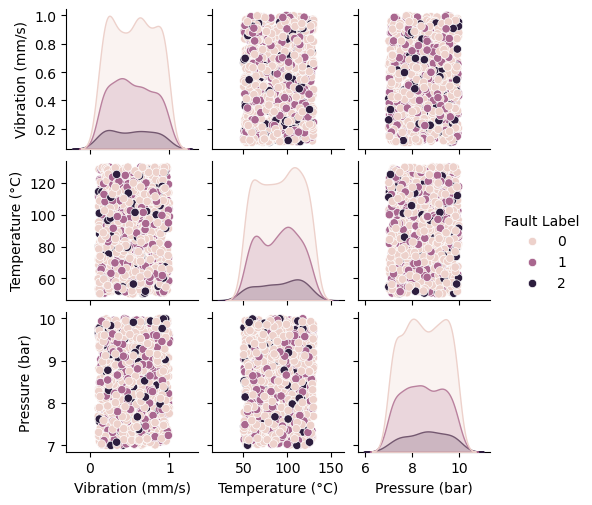

In [6]:
## According to the Pairplot, We do not see any variance and predictive values in "RMS Vibration" and "Mean Temp". 
## "Vibration", "Temperature" and "Pressure" were taken as training features.

Features= ['Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)']
pair_df2 = df[Features + ['Fault Label']]

sns.pairplot(pair_df2, hue='Fault Label',diag_kind='kde', height=1.7)

plt.show()  

### **Check Data Imbalance**

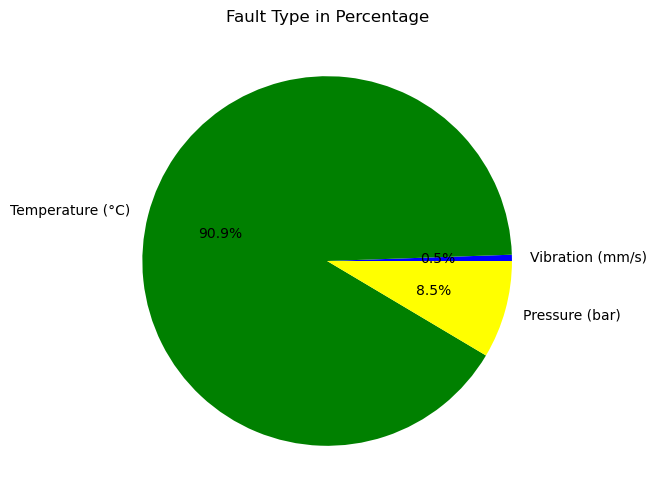

Data Imbalance:
Fault Label
0    60.9 %
1    30.3 %
2     8.8 %
Name: proportion, dtype: object


Text(0.5, 1.0, 'Count of Each Fault Type')

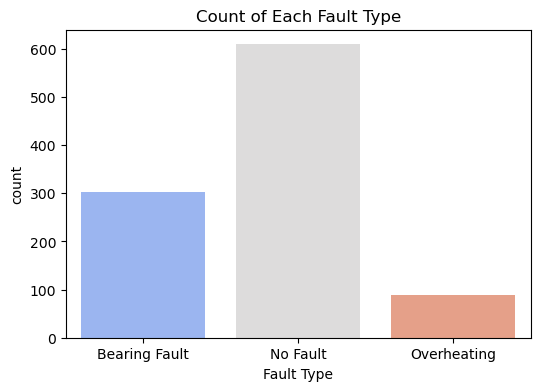

In [7]:
# Check Data imbalance
#Pie Chart Showcase
Faults = [
    pair_df2["Vibration (mm/s)"].sum(),
    pair_df2["Temperature (°C)"].sum(),
    pair_df2["Pressure (bar)"].sum()
]

Labels = ['Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)']

plt.figure(figsize=(6,6))
plt.pie(Faults, labels=Labels, autopct="%.1f%%", colors=["blue","green","yellow"])
plt.title("Fault Type in Percentage")
plt.show()

counts = pair_df2['Fault Label'].value_counts(normalize=True)
percent = (counts / counts.sum()) * 100

print("Data Imbalance:")
print(percent.round(2).astype(str) + " %")

# This means the data is highly imbalanced (60/30/8).

# Data imbalance in Plot output 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Fault Type', hue='Fault Type', palette='coolwarm', legend=False)

plt.title('Count of Each Fault Type')



### **Quantitative Analysis**

Mean 
                Vibration (mm/s)  Temperature (°C)  Pressure (bar)  \
Fault Type                                                          
Bearing Fault          0.534695         89.926908        8.473219   
No Fault               0.547332         90.816609        8.511601   
Overheating            0.521509         90.979731        8.593941   

               RMS Vibration  Mean Temp  Fault Label  
Fault Type                                            
Bearing Fault       0.601657  90.561384          1.0  
No Fault            0.601657  90.561384          0.0  
Overheating         0.601657  90.561384          2.0  
----------------------------------------------------------------------------------------------------------------------------------------------
Standard Deviation 
                Vibration (mm/s)  Temperature (°C)  Pressure (bar)  \
Fault Type                                                          
Bearing Fault          0.256694         22.436700        0.867289   
N

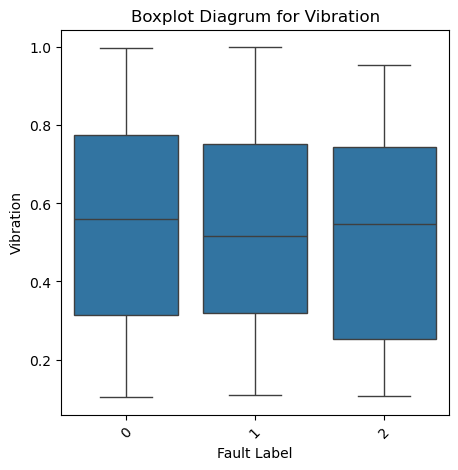

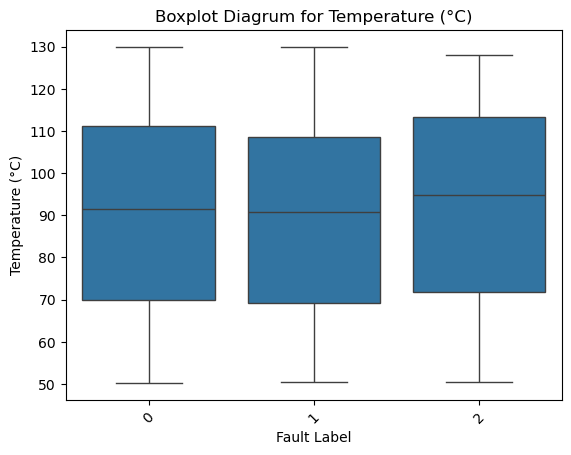

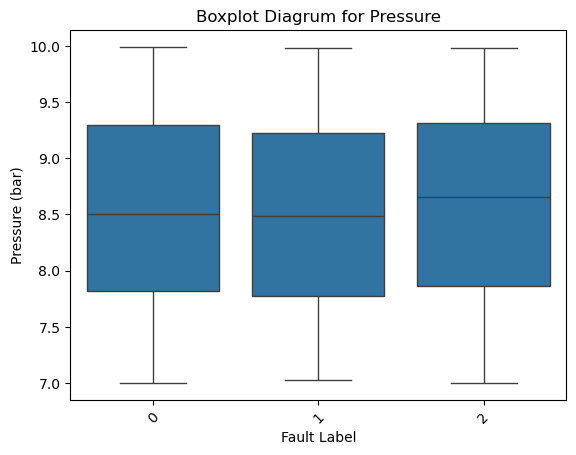

Quantitative analysis of mean and standard deviation across fault types does not show a distinct difference among vibration, temperature and pressure patterns.


In [8]:
## Quantitative Analysis

## Mean
print("Mean \n", df.groupby('Fault Type').mean())

print("----------------------------------------------------------------------------------------------------------------------------------------------")

## Standard Deviation
print("Standard Deviation \n", df.groupby('Fault Type').std()) 

# The mean and standard deviation values further support understanding how features behave across different classes.
plt.figure(figsize=(5,5))
sns.boxplot(y='Vibration (mm/s)', x='Fault Label', data=pair_df2)
plt.title("Boxplot Diagrum for Vibration")
plt.ylabel("Vibration")
plt.xlabel("Fault Label")
plt.xticks(rotation=45)

plt.show()

sns.boxplot(y='Temperature (°C)', x='Fault Label', data=pair_df2)
plt.title("Boxplot Diagrum for Temperature (°C)")
plt.ylabel("Temperature (°C)")
plt.xlabel("Fault Label")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(y='Pressure (bar)', x='Fault Label', data=pair_df2)
plt.title("Boxplot Diagrum for Pressure")
plt.ylabel("Pressure (bar)")
plt.xlabel("Fault Label")
plt.xticks(rotation=45)
plt.show()

print("Quantitative analysis of mean and standard deviation across fault types does not show a distinct difference among vibration, temperature and pressure patterns.")

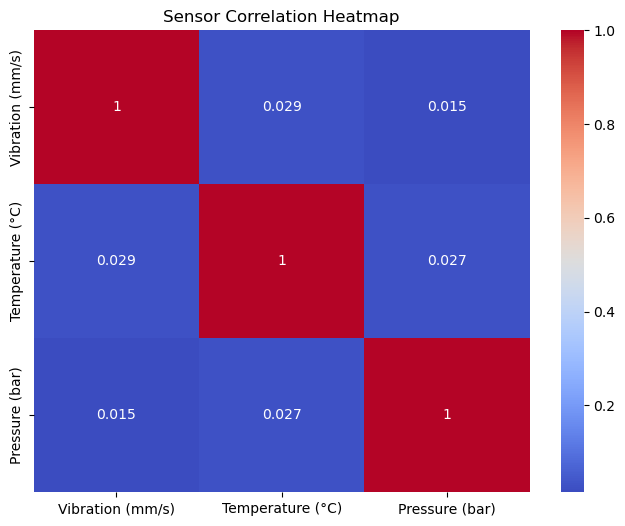

In [9]:
# Graph 1 – Sensor Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)']].corr(), annot=True, cmap='coolwarm')
plt.title('Sensor Correlation Heatmap')
plt.show()

### **Hypothesis Test - normaltest**

NormaltestResult(statistic=np.float64(942.0543911213797), pvalue=np.float64(2.7257633111921575e-205))
NormaltestResult(statistic=np.float64(849.1616501508721), pvalue=np.float64(4.044739421209102e-185))
NormaltestResult(statistic=np.float64(699.978166956062), pvalue=np.float64(1.0038580803690464e-152))
Normality Test Results (D’Agostino K² Test)
-----------------------------------------------------
Vibration (mm/s): statistic = 942.0544, p-value = 0.000000
 → Reject Null Hypothesis: Data is **NOT normally distributed**

Temperature (°C): statistic = 849.1617, p-value = 0.000000
 → Reject Null Hypothesis: Data is **NOT normally distributed**

Pressure (bar): statistic = 699.9782, p-value = 0.000000
 → Reject Null Hypothesis: Data is **NOT normally distributed**



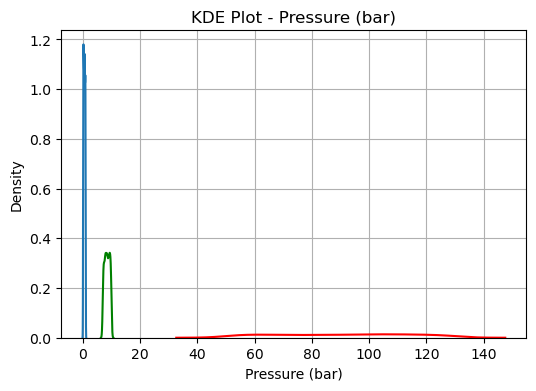

In [10]:
# Hypothesis Test was performed to test whether the data were normally distributed or not.

print(normaltest(df['Vibration (mm/s)']))
print(normaltest(df['Temperature (°C)']))
print(normaltest(df['Pressure (bar)']))

numeric_cols = ['Vibration (mm/s)', 'Temperature (°C)', 'Pressure (bar)']

alpha = 0.05

print("Normality Test Results (D’Agostino K² Test)")
print("-----------------------------------------------------")

for col in numeric_cols:
    stat, p_value = normaltest(df[col])   # run test on each column
    print(f"{col}: statistic = {stat:.4f}, p-value = {p_value:.6f}")

    if p_value < alpha:
        print(" → Reject Null Hypothesis: Data is **NOT normally distributed**\n")
    else:
        print(" → Fail to Reject Null: Data is **normally distributed**\n")

# KDE Plot 1: Vibration ---
plt.figure(figsize=(6,4))
sns.kdeplot(df['Vibration (mm/s)'])
sns.kdeplot(df['Temperature (°C)'], color='red')
sns.kdeplot(df['Pressure (bar)'], color='green')
plt.title("KDE Plot - Pressure (bar)")
plt.xlabel("Pressure (bar)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

### Since the Data is not normally distributed & imbalance. Do we need to use non-parametric tests and transformation?
### **Mann-Whitney rank-test**

In [11]:
# Mann-Whitney rank-test 
# Groups
g1 = df[df["Fault Label"] == 0]["Pressure (bar)"]
g2 = df[df["Fault Label"] != 0]["Pressure (bar)"]

# Mann-Whitney U-test (non-parametric)
stat, p_value = mannwhitneyu(g1, g2, alternative="two-sided")

print("U-statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant difference between groups.")
else:
    print("No significant difference between groups.")

#-------------------------------------------------------------
# Groups
g1 = df[df["Fault Label"] == 0]["Temperature (°C)"]
g2 = df[df["Fault Label"] != 0]["Temperature (°C)"]

# Mann-Whitney U-test (non-parametric)
stat, p_value = mannwhitneyu(g1, g2, alternative="two-sided")

print("U-statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant difference between groups.")
else:
    print("No significant difference between groups.")
#-------------------------------------------------------------
# Groups
g1 = df[df["Fault Label"] == 0]["Vibration (mm/s)"]
g2 = df[df["Fault Label"] != 0]["Vibration (mm/s)"]

# Mann-Whitney U-test (non-parametric)
stat, p_value = mannwhitneyu(g1, g2, alternative="two-sided")

print("U-statistic:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Significant difference between groups.")
else:
    print("No significant difference between groups.")

U-statistic: 119977.0
p-value: 0.8369839602506899
No significant difference between groups.
U-statistic: 121144.0
p-value: 0.6400708409635044
No significant difference between groups.
U-statistic: 123204.0
p-value: 0.352467146883903
No significant difference between groups.


### **Data Splitting (Train & Test) & Scalling**

In [12]:
X = df[Features].values
y = df['Fault Label'].values

# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Standardization (fit on TRAIN only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Subspace projection (PCA Test)**

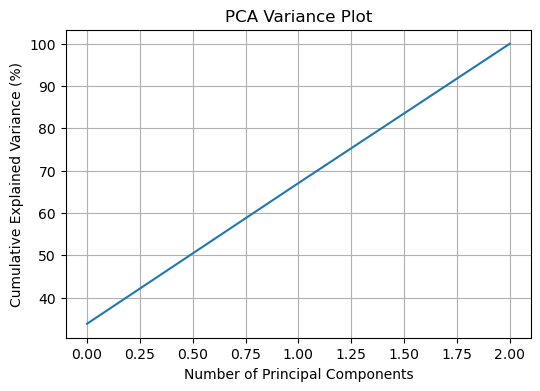

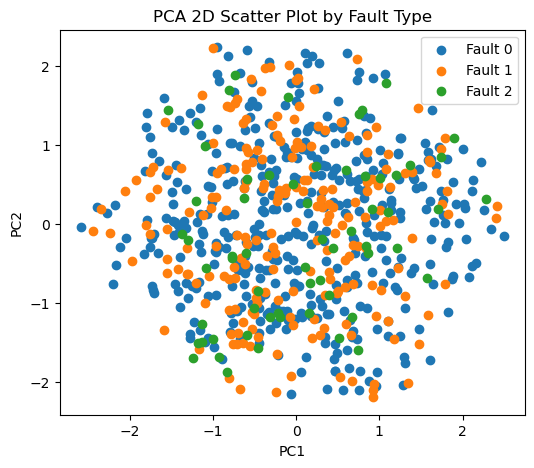

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


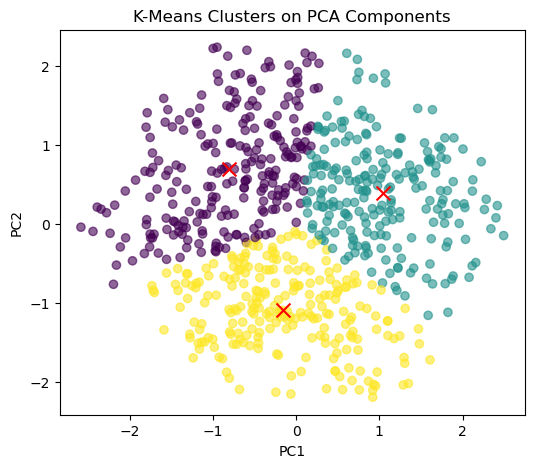

In [13]:
#PCA (fit ONLY on training data)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Graph 2 – PCA Variance Plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Variance Plot')
plt.grid(True)
plt.show()

# Graph 3 – PCA 2D Scatter Plot (Colored by Fault State)
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(6,5))
for label in np.unique(y_train):
    plt.scatter(
        X_train_pca2[y_train == label, 0],
        X_train_pca2[y_train == label, 1],
        label=f"Fault {label}"
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Scatter Plot by Fault Type')
plt.legend()
plt.show()

# Graph 4 – K-Means Cluster Visualization
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_pca2)

plt.figure(figsize=(6,5))
plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], c=clusters, alpha=0.6)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    color='red',
    marker='x',
    s=100
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters on PCA Components')
plt.show()


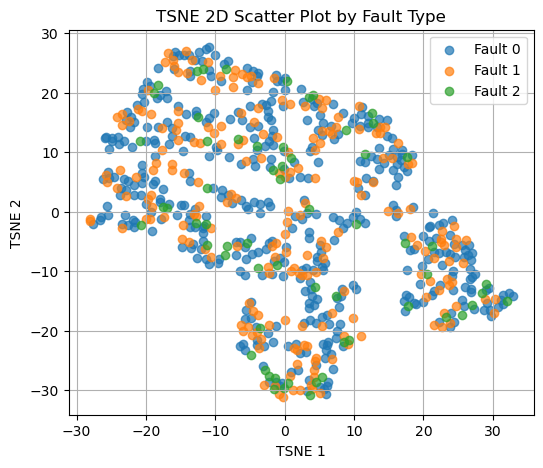

In [14]:
from sklearn.manifold import TSNE

# TSNE Transformation
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# TSNE Visualization
plt.figure(figsize=(6,5))
for label in np.unique(y_train):
    plt.scatter(
        X_train_tsne[y_train == label, 0],
        X_train_tsne[y_train == label, 1],
        label=f"Fault {label}",
        alpha=0.7
    )

plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE 2D Scatter Plot by Fault Type')
plt.legend()
plt.grid(True)
plt.show()


# **Model Creation**

=== SVM ===
               precision    recall  f1-score   support

Bearing Fault       0.69      0.29      0.41        92
     No Fault       0.34      0.53      0.42        45
  Overheating       0.02      0.08      0.04        13

     accuracy                           0.35       150
    macro avg       0.35      0.30      0.29       150
 weighted avg       0.53      0.35      0.38       150



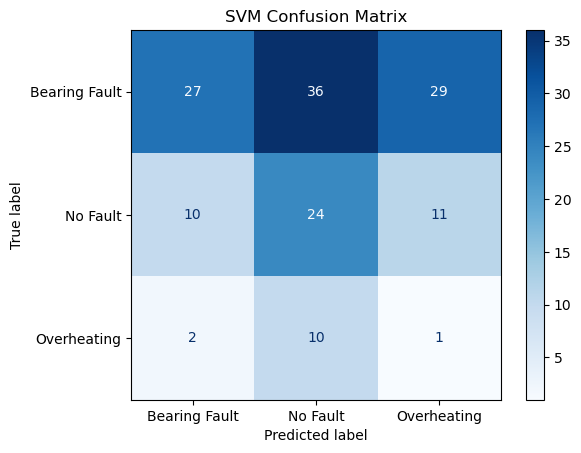

=== Random Forest ===
               precision    recall  f1-score   support

Bearing Fault       0.62      0.91      0.74        92
     No Fault       0.38      0.11      0.17        45
  Overheating       0.00      0.00      0.00        13

     accuracy                           0.59       150
    macro avg       0.34      0.34      0.30       150
 weighted avg       0.50      0.59      0.51       150



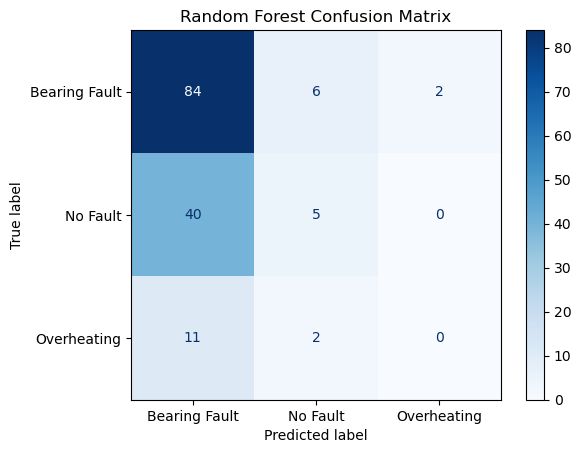

=== Gradient Boosting ===
               precision    recall  f1-score   support

Bearing Fault       0.61      0.89      0.73        92
     No Fault       0.21      0.07      0.10        45
  Overheating       0.00      0.00      0.00        13

     accuracy                           0.57       150
    macro avg       0.28      0.32      0.28       150
 weighted avg       0.44      0.57      0.48       150



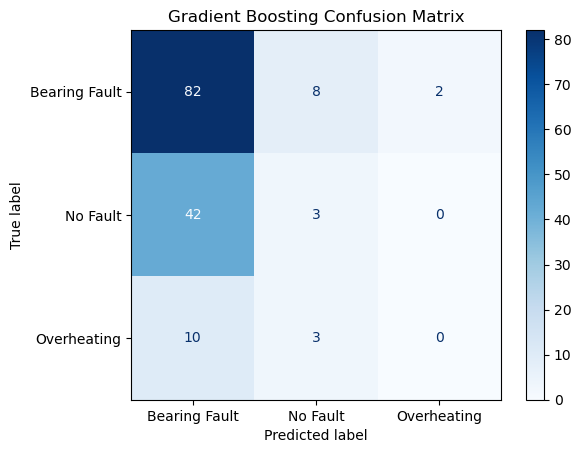

=== Neural Network ===
               precision    recall  f1-score   support

Bearing Fault       0.61      1.00      0.76        92
     No Fault       0.00      0.00      0.00        45
  Overheating       0.00      0.00      0.00        13

     accuracy                           0.61       150
    macro avg       0.20      0.33      0.25       150
 weighted avg       0.38      0.61      0.47       150



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


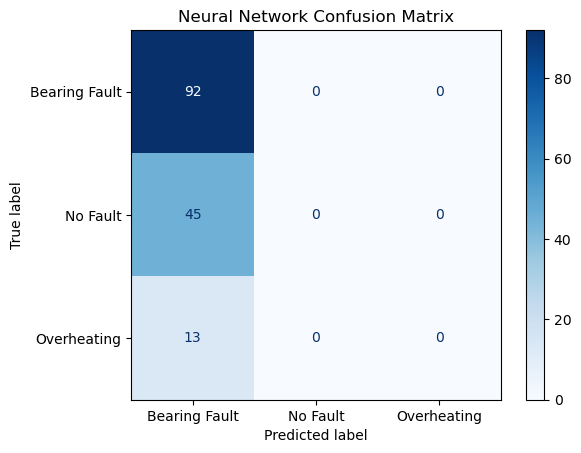

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression ===
               precision    recall  f1-score   support

Bearing Fault       0.64      0.30      0.41        92
     No Fault       0.33      0.33      0.33        45
  Overheating       0.08      0.38      0.14        13

     accuracy                           0.32       150
    macro avg       0.35      0.34      0.29       150
 weighted avg       0.50      0.32      0.36       150



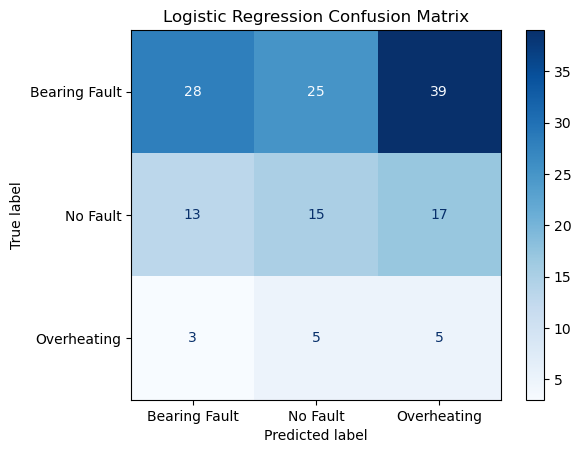

C:\Users\Lakshan Siriwardhana\AppData\Local\Temp\ipykernel_16860\2399411362.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=[v['f1_macro'] for v in model_results.values()], palette='coolwarm')


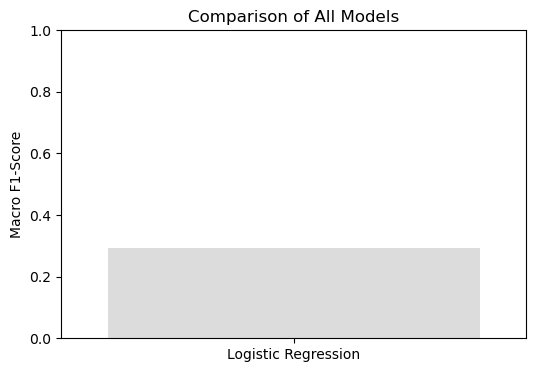

Best performing model based on F1-macro: Logistic Regression with F1-score: 0.29


NameError: name 'rf_model' is not defined

In [15]:
models = {
'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
'Gradient Boosting': GradientBoostingClassifier(random_state=42),
'Neural Network': MLPClassifier(hidden_layer_sizes=(64,32), random_state=42,max_iter=2000, learning_rate_init=0.001, early_stopping=True),
'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=500, random_state=42)
}


model_results = {}


for name, model in models.items():
    print(f'=== {name} ===')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, target_names=df['Fault Type'].unique())
    print(report)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=df['Fault Type'].unique())
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


# Store F1-macro for comparison
f1_macro = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
model_results[name] = {'f1_macro': f1_macro, 'model': model}


# Compare all models

plt.figure(figsize=(6,4))
sns.barplot(x=list(model_results.keys()), y=[v['f1_macro'] for v in model_results.values()], palette='coolwarm')
plt.ylabel('Macro F1-Score')
plt.title('Comparison of All Models')
plt.ylim(0,1)
plt.show()


# Select the best model
best_model_name = max(model_results, key=lambda k: model_results[k]['f1_macro'])
best_f1 = model_results[best_model_name]['f1_macro']
print(f'Best performing model based on F1-macro: {best_model_name} with F1-score: {best_f1:.2f}')

# Optional:
# Learning curve for best model (example: Random Forest)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train_scaled, y_train, cv=5, scoring='f1_macro', train_sizes=np.linspace(0.1,1.0,5))
plt.figure(figsize=(6,4))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation score')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('F1 Score (Macro)')
plt.legend(loc='best')
plt.show()



In [ ]:
import nbconvert

!jupyter nbconvert --to script AML_project.ipynb
